In [1]:
from json import dumps
from pathlib import Path
from typing import Union

import numpy as np
import matplotlib.pyplot as plt
ITERATIONS = iter([1, 3, 7, 50, 100, 300, 600, 1000, 5000, 10000, 50000])

In [2]:
class MyModel:
    # This value can be changed to make calculations faster, but should not exceed 1.7
    LEARNING_RATE = 0.1

    # This value can be changed to make calculations more precise
    ERROR = 0.0000001

    def __init__(self, data):
        self.km = data[1:, 0]
        self.price = data[1:, 1]
        self.km_norm = self.normalize_data(self.km)
        self.t0 = 0.0
        self.t0_denorm = 0.0
        self.t1 = 0.0
        self.t1_denorm = 0.0
        self.sq_err = 0.0

    @staticmethod
    def normalize_data(array: np.array):
        """
        Normalizes data by converting the minimum value to 0 and maximum value
        to 1 shifting the values in between correspondingly.
        """
        return (array - min(array)) / (max(array) - min(array))

    def save_thetas(self):
        """
        Saves thetas to the file in json format
        """
        data = {'theta0': self.t0, 'theta1': self.t1}
        p = Path(__file__).parent.absolute() / 'thetas.json'
        with open(p, 'w') as f:
            f.write(dumps(data))
        print('SUCCESS')

    def denormalize_thetas(self):
        """
        Converts thetas calculated for the normalized dataset to the initial
        one depending on the positive or negative value of theta1
        """
        y_min = self.estimated_price(1)
        y_max = self.estimated_price(0)
        if self.t1 < 0:
            self.t0_denorm = (y_max * max(self.km) - y_min * min(self.km)) / \
                      (max(self.km) - min(self.km))
            self.t1_denorm = (y_min - self.t0) / max(self.km)
        else:
            self.t0_denorm = (y_max * min(self.km) - y_min * max(self.km)) / \
                      (min(self.km) - max(self.km))
            self.t1_denorm = (y_min - self.t0) / min(self.km)

    def estimated_price(self, x: Union[int, float], denorm=False):
        """
        Calculates the price for the given value on the x-axis depending on
        the current value of thetas
        """
        if denorm:
            return self.t1_denorm * x + self.t0_denorm
        return self.t1 * x + self.t0

    def calculate_square_error(self) -> float:
        """
        Calculates square error depending on the current value of thetas
        """
        summ = sum([(self.estimated_price(km_i) - price_i) ** 2
                    for km_i, price_i in zip(self.km_norm, self.price)])
        return summ / (2 * len(self.km_norm))

    def _calculate_t0(self):
        """
        Calculates t0 depending on the current values of t0 and learning rate
        """
        size = len(self.km)
        summ = sum([self.estimated_price(km_i) - price_i
                    for km_i, price_i in zip(self.km_norm, self.price)])
        return (self.LEARNING_RATE / size) * summ

    def _calculate_t1(self):
        """
        Calculates t1 depending on the current values of t0 and learning rate
        """
        size = len(self.km)
        summ = sum([(self.estimated_price(km_i) - price_i) * km_i
                    for km_i, price_i in zip(self.km_norm, self.price)])
        return (self.LEARNING_RATE / size) * summ

    def train_model(self, start, stop) -> None:
        """
        Calculates thetas over and over again till the difference between the
        two consecutive calculations' square error does not exceed the
        predefined value
        """
        i = start
        while True:
            i += 1
            tmp_t0 = self.t0 - self._calculate_t0()
            tmp_t1 = self.t1 - self._calculate_t1()
            self.t0 = tmp_t0
            self.t1 = tmp_t1
            tmp_sq_er = self.calculate_square_error()
            if abs(tmp_sq_er - self.sq_err) < self.ERROR:
                break
            self.sq_err = tmp_sq_er
            if i == stop:
                break

In [3]:
def show_graph(md, iter):
    def plot_data():
        plt.scatter(md.km, md.price)
        plt.xlabel("km")
        plt.ylabel("price")
    plot_data()
    md.denormalize_thetas()
    plt.plot([min(md.km), max(md.km) ], [md.estimated_price(min(md.km), denorm=True), md.estimated_price(max(md.km), denorm=True)], color='r')
    print(f'{iter} iteration')
    plt.show()

In [4]:
p = Path('data.csv')
if not p.exists():
    print(f'File {p} does not exist.')
    exit(1)
model = MyModel(np.genfromtxt(p, delimiter=','))

1 iteration


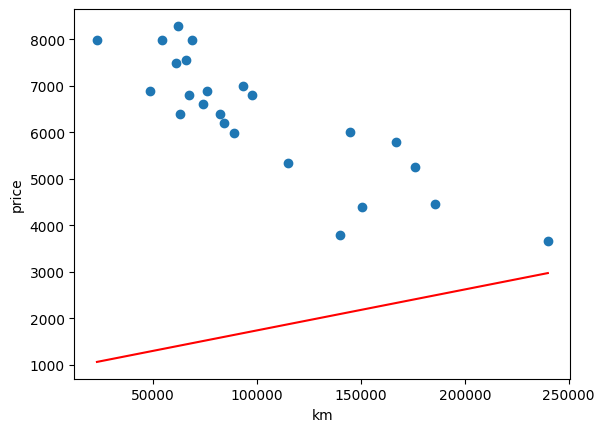

In [5]:
end = 0
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

3 iteration


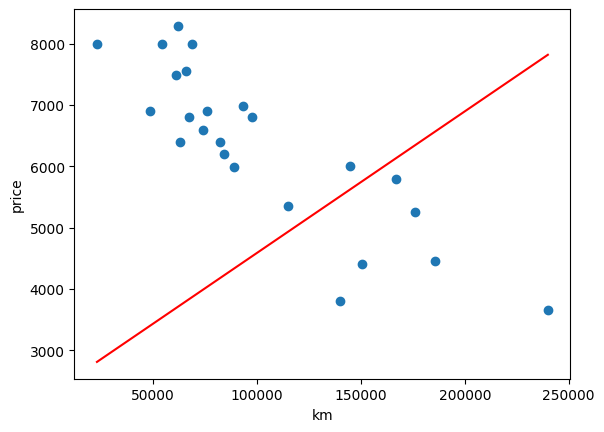

In [6]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

7 iteration


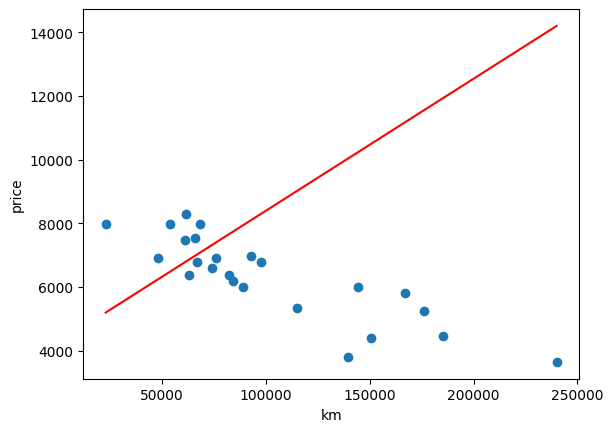

In [7]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

50 iteration


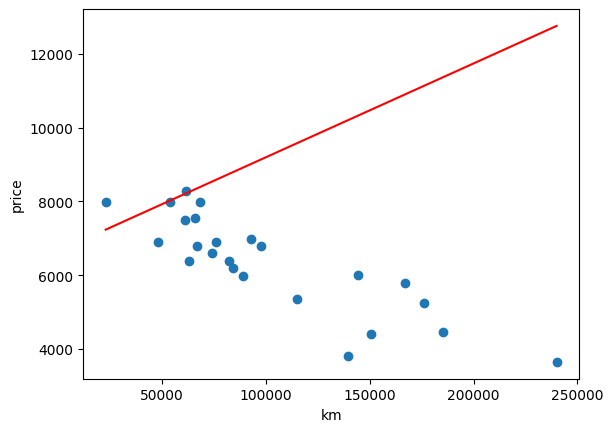

In [8]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

100 iteration


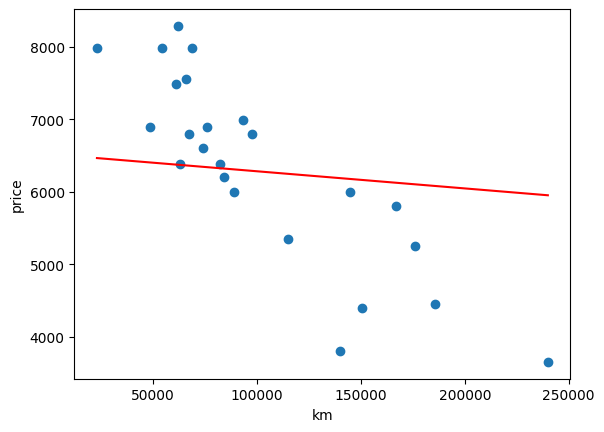

In [9]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

300 iteration


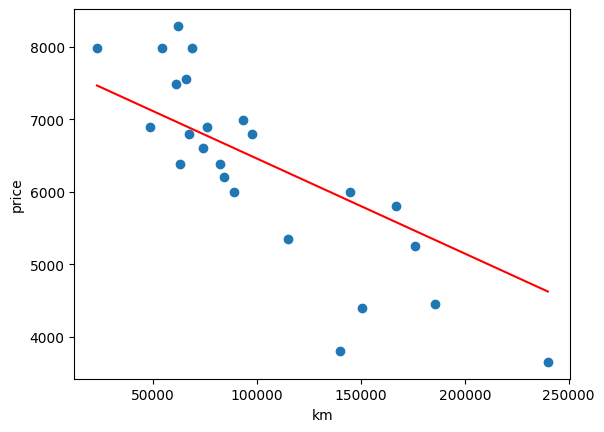

In [10]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

600 iteration


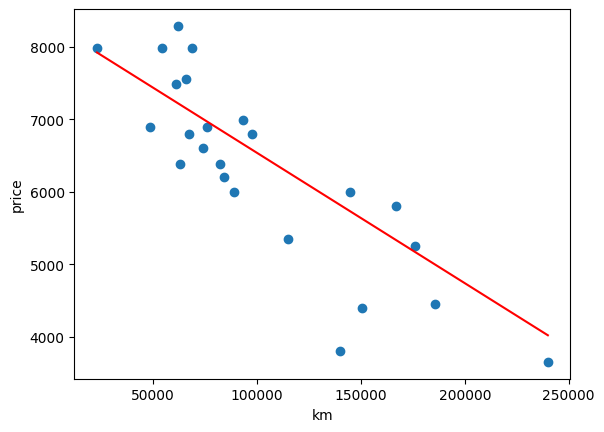

In [11]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

1000 iteration


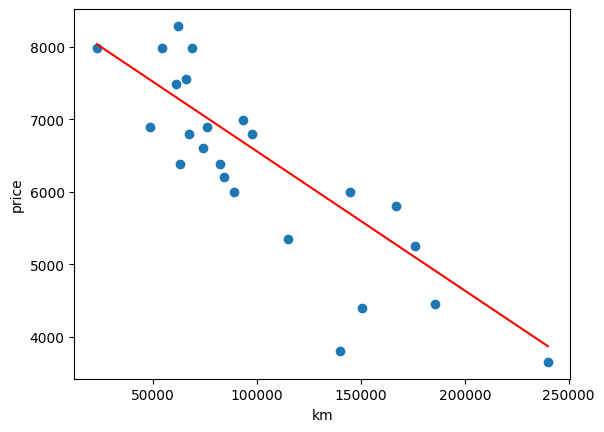

In [12]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

5000 iteration


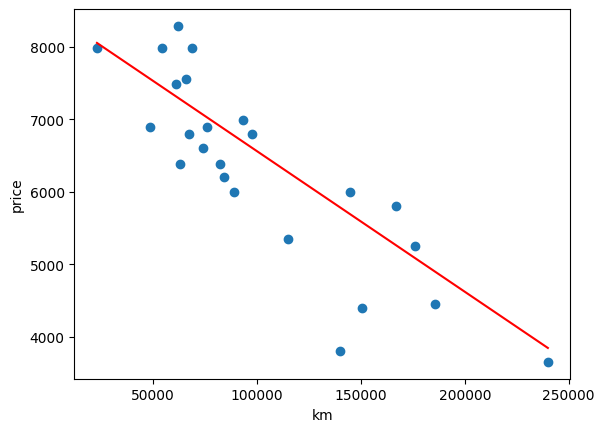

In [13]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

10000 iteration


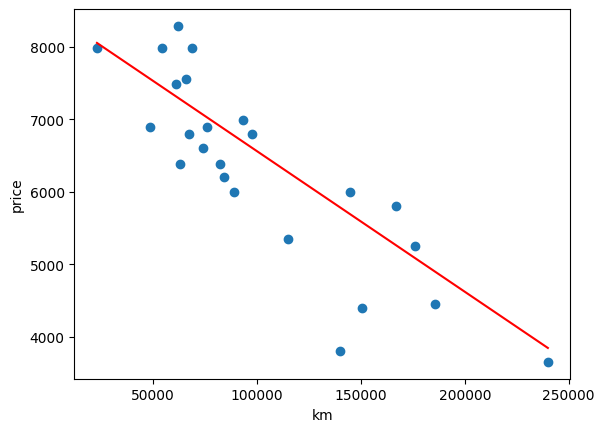

In [14]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)

50000 iteration


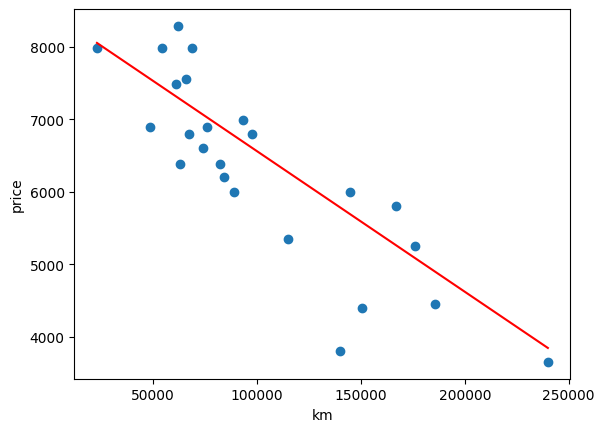

In [15]:
start, end = end, next(ITERATIONS)
model.train_model(start, end)
show_graph(model, end)